In [1]:
!pip install scikit-learn pandas numpy matplotlib missingno xlsxwriter

  Obtaining dependency information for xlsxwriter from https://files.pythonhosted.org/packages/fa/34/a22e6664211f0c8879521328000bdcae9bf6dbafa94a923e531f6d5b3f73/xlsxwriter-3.2.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/172.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/172.3 kB ? eta -:--:--
   ------ -------------------------------- 30.7/172.3 kB 262.6 kB/s eta 0:00:01
   ------ -------------------------------- 30.7/172.3 kB 262.6 kB/s eta 0:00:01
   ------ -------------------------------- 30.7/172.3 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 41.0/172.3 kB 140.3 kB/s eta 0:00:01
   ------------- ------------------------- 61.4/172.3 kB 204.8 kB/s eta 0:00:01
   -------------------- ------------------ 92.2/172.3 kB 238.1 kB/s eta 0:00:01
   -------------------- ------------------ 92.2/172.3 kB 238.1 kB/s eta 0:00:01
   --------------------------- ---------- 122.9/172.3 kB 277.4 kB/s eta 0:00:01
   ---------

# Advertising and Sales Regression

In this notebook, we'll be exploring the use of regression methods to predict product sales (target) using 3 different advertising spends (predictors). We'll identify if there are relationships between the predictors and sales and explain this relationship.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import missingno
import xlsxwriter

**Data Description**
1. TV - advertising spend (in thousand dollars) on TV commercials.
2. Radio - advertising spend (in thousand dollars) on radio spots.
3. Newspaper - advertising spend (in thousand dollars) on newspaper ads.
4. Sales-  product sales revenue (in thousand units) or number of products sold.

In [4]:
# import dataset
df = pd.read_csv('resources/advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# check for null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


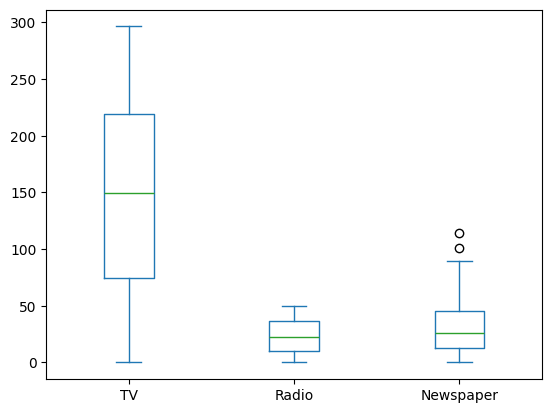

In [11]:
# check for outliers that may affect prediction
df[['TV', 'Radio', 'Newspaper']].plot(kind='box', showfliers=True);

## Simple Linear Regression

Assumption: There is approximately a linear relationship between $X$ and $Y$. The goal of this is to minimize error $\epsilon$ where
$$ Y \approx  \beta_0 + \beta_1 X + \epsilon$$


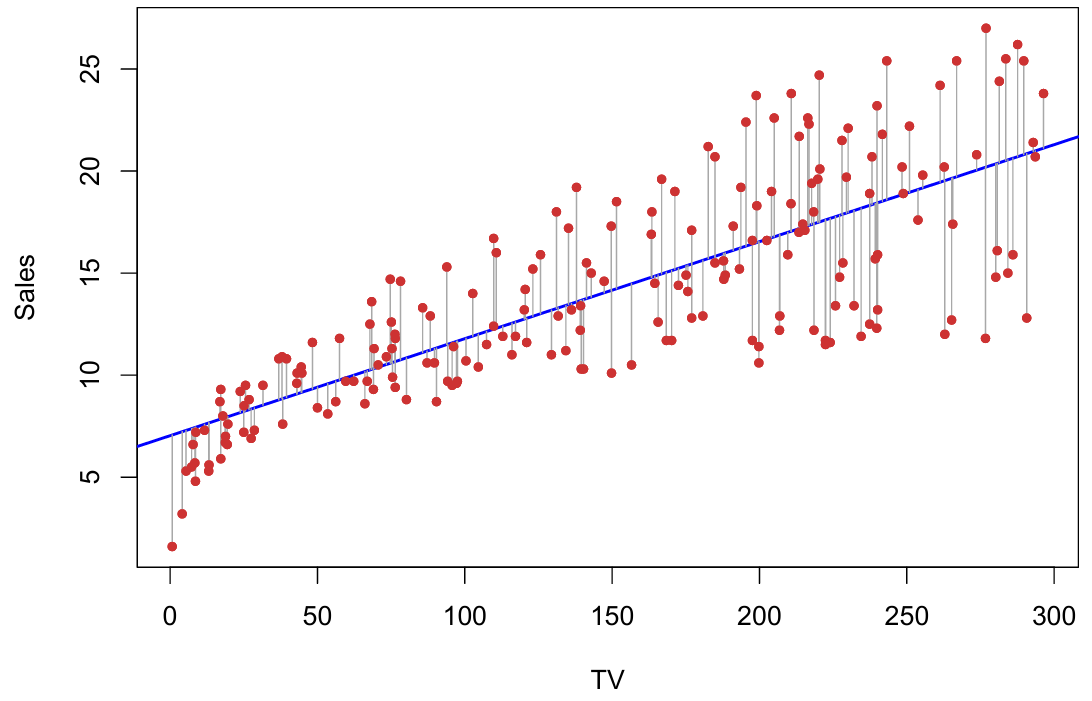

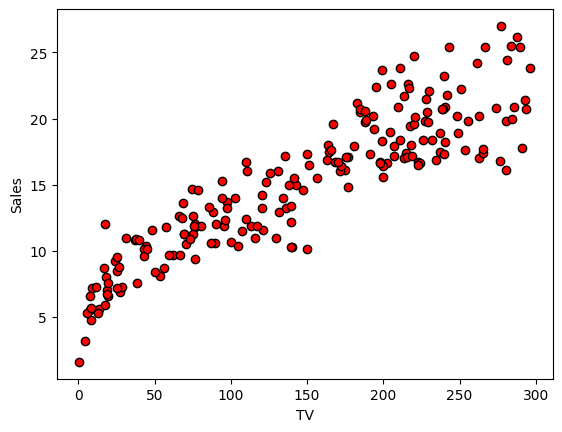

In [15]:
# scatter plot between predictors (TV, Radio, Newspaper) and target (Sales)
x_lab = 'TV'

plt.scatter(df[x_lab], df['Sales'], color='red', edgecolor='black')
plt.xlabel(x_lab)
plt.ylabel("Sales")
plt.show()

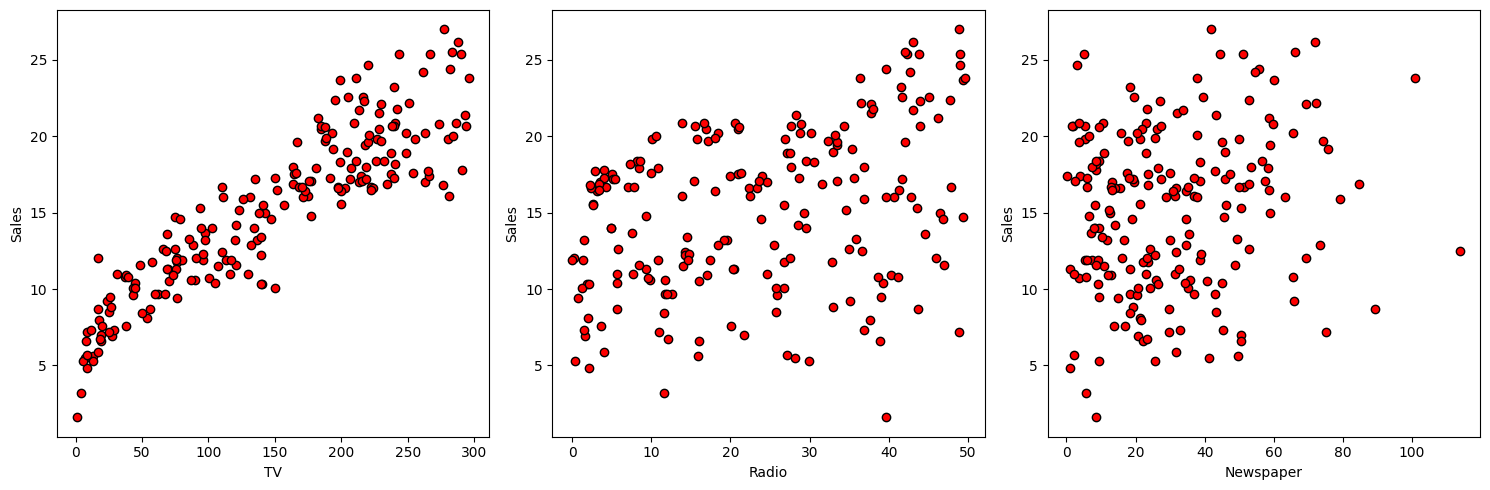

In [27]:
predictors = df.columns[:3]

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].scatter(df[predictors[i]], df['Sales'], color='red', edgecolor='black')
    axs[i].set_xlabel(predictors[i])
    axs[i].set_ylabel("Sales")

plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression for each predictor
for predictor in predictors:
    X = df[[predictor]]
    y = df['Sales']

    model = LinearRegression()
    model.fit(X, y)

    print(f"Linear Regression for {predictor} vs Sales:")
    print(f"  Intercept (B0): {model.intercept_:.4f}")
    print(f"  Coefficient (B1): {model.coef_[0]:.4f}")
    print("-" * 30)

Linear Regression for TV vs Sales:
  Intercept (B0): 6.9748
  Coefficient (B1): 0.0555
------------------------------
Linear Regression for Radio vs Sales:
  Intercept (B0): 12.2357
  Coefficient (B1): 0.1244
------------------------------
Linear Regression for Newspaper vs Sales:
  Intercept (B0): 13.9595
  Coefficient (B1): 0.0383
------------------------------


From the $\beta_0$ and $\beta_1$ values, we can already gain some insight on the relationship of each individual predictor with the target.

For example in the Coefficient (B1)'s case:

It represents the estimated change in the target variable (Sales) for a one-unit increase in the predictor variable (TV, Radio, or Newspaper), assuming all other factors are held constant. A 0.0555 B1 value for TV vs Sales indicates that the sales are estimated to increase by 55.5 units for every additional thousand dollars increase spend on TV ads.

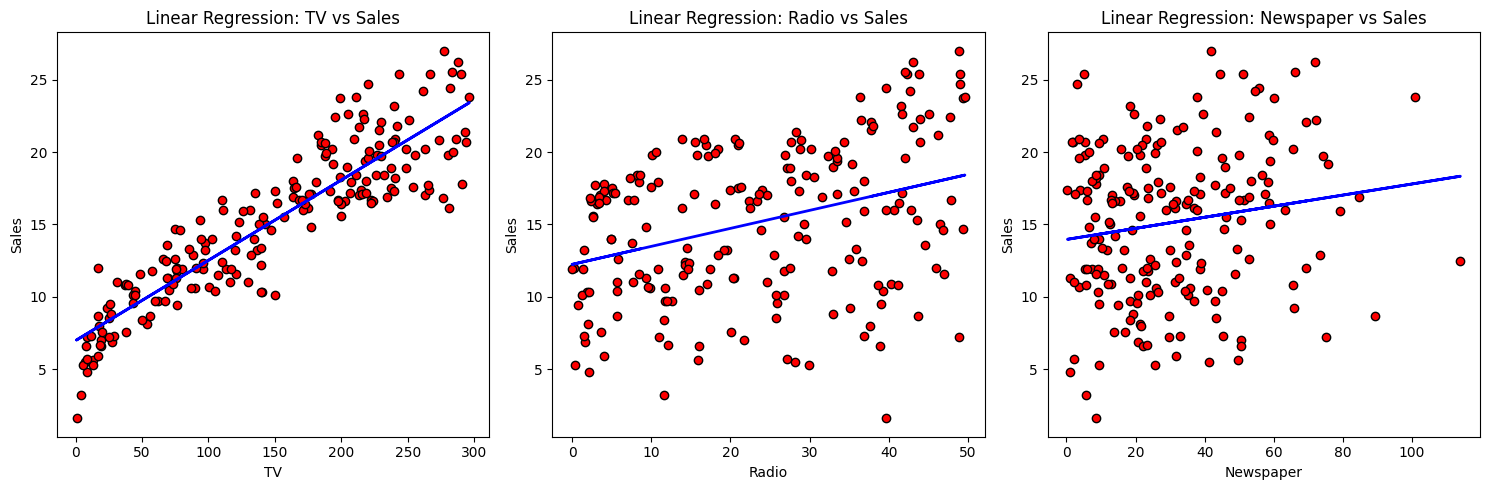

In [29]:
# scatter plot with fitted LR model

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

for i, predictor in enumerate(predictors):
    X = df[[predictor]]
    y = df['Sales']

    model = LinearRegression()
    model.fit(X, y)

    axs[i].scatter(df[predictor], df['Sales'], color='red', edgecolor='black')
    axs[i].plot(df[predictor], model.predict(X), color='blue', linewidth=2)
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel("Sales")
    axs[i].set_title(f'Linear Regression: {predictor} vs Sales')

plt.tight_layout()
plt.show()

We don't stop with creating/fitting a regression model to the data. Our next step is to always assess its performance using a quantifiable metric. For our case, we'll use $R^2$, $RSS$, and $RMSE$.

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

predictors = df.columns[:3]

for predictor in predictors:
    X = df[[predictor]]
    y = df['Sales']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    # Calculate metrics
    r_squared = r2_score(y, y_pred)
    rss = np.sum((y - y_pred)**2)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"Linear Regression for {predictor} vs Sales:")
    print(f"  R-squared (R^2): {r_squared:.4f}")
    print(f"  Residual Sum of Squares (RSS): {rss:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 30)

Linear Regression for TV vs Sales:
  R-squared (R^2): 0.8122
  Residual Sum of Squares (RSS): 1043.5488
  Root Mean Squared Error (RMSE): 2.2842
------------------------------
Linear Regression for Radio vs Sales:
  R-squared (R^2): 0.1222
  Residual Sum of Squares (RSS): 4876.8099
  Root Mean Squared Error (RMSE): 4.9380
------------------------------
Linear Regression for Newspaper vs Sales:
  R-squared (R^2): 0.0250
  Residual Sum of Squares (RSS): 5417.3545
  Root Mean Squared Error (RMSE): 5.2045
------------------------------


## Multiple Linear Regression

Simple linear regression is a useful approach for predicting a response on the
basis of a single predictor variable. However, in practice we often have more
than one predictor.

For example, in the Advertising data, we have examined
the relationship between sales and TV advertising. We also have data for
the amount of money spent advertising on the radio and in newspapers,
and we may want to know whether either of these two media is associated
with sales. How can we extend our analysis of the advertising data in order
to accommodate these two additional predictors?

One option is to run three separate simple linear regressions, each of which uses a different advertising medium as a predictor. However, the approach of fitting a separate simple linear regression model for each predictor is not entirely satisfactory.

Instead of fitting a separate simple linear regression model for each pre
dictor, a better approach is to extend the simple linear regression model so that it can directly accommodate multiple predictors.

In general, suppose that we have p distinct predictors. Then the multiple
linear regression model takes the form.

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon$$

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Multiple Linear Regression
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Calculate metrics
r_squared = r2_score(y, y_pred)
rss = np.sum((y - y_pred)**2)
rmse = np.sqrt(mean_squared_error(y, y_pred))


print("Multiple Linear Regression:")
print(f"  Intercept (B0): {model.intercept_:.4f}")
print("  Coefficients (B1):")
for i, col in enumerate(X.columns):
    print(f"    {col}: {model.coef_[i]:.4f}")

print(f"  R-squared (R^2): {r_squared:.4f}")
print(f"  Residual Sum of Squares (RSS): {rss:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

Multiple Linear Regression:
  Intercept (beta_0): 4.6251
  Coefficients (beta_i):
    TV: 0.0544
    Radio: 0.1070
    Newspaper: 0.0003
  R-squared (R^2): 0.9026
  Residual Sum of Squares (RSS): 541.2012
  Root Mean Squared Error (RMSE): 1.6450


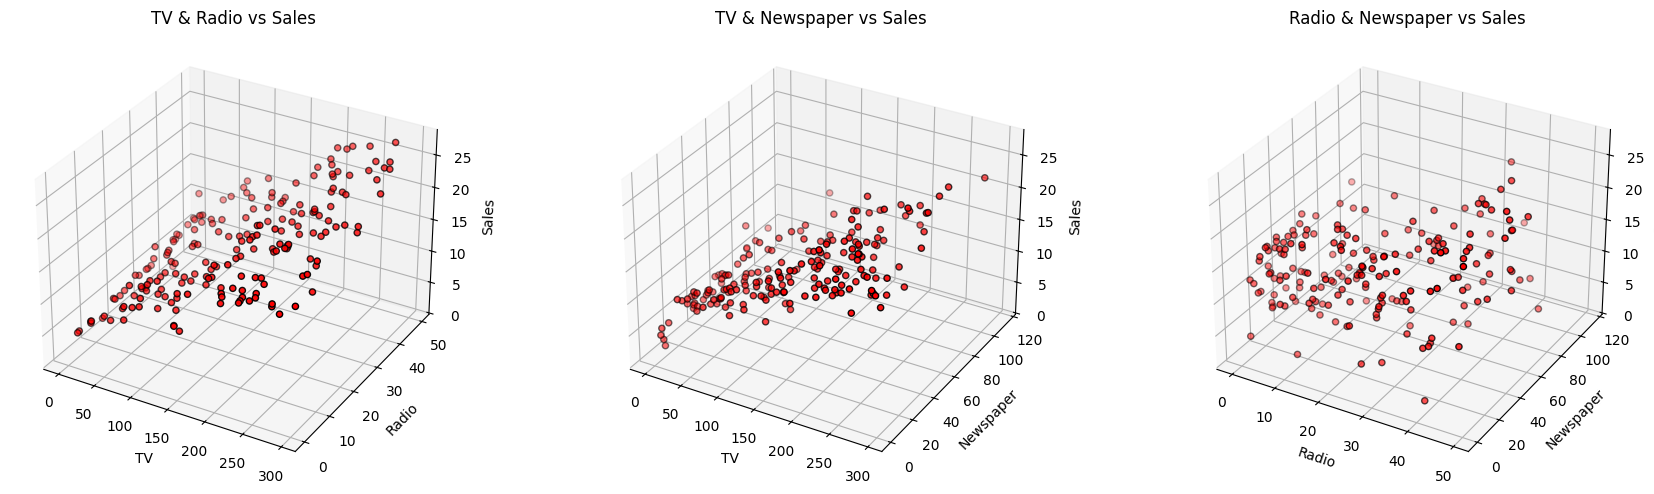

In [37]:
from mpl_toolkits.mplot3d import Axes3D

predictor_pairs = [('TV', 'Radio'), ('TV', 'Newspaper'), ('Radio', 'Newspaper')]

fig = plt.figure(figsize=(18, 5))

for i, (X1, X2) in enumerate(predictor_pairs):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(df[X1], df[X2], df['Sales'], c='red', marker='o', edgecolor='black')
    ax.set_xlabel(X1)
    ax.set_ylabel(X2)
    ax.set_zlabel('Sales')
    ax.set_title(f'{X1} & {X2} vs Sales')

plt.tight_layout()
plt.show()

## Polynomial Regression

The standard way to extend linear regression to settings in which the  relationship between the predictors and the response is nonlinear has been to replace the standard linear model with a polynomial function
$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \ldots + \beta_d x_i^d + \epsilon_i$$

Polynomial Regression (Degree 2) for TV vs Sales:
  R-squared (R^2): 0.0251
  Residual Sum of Squares (RSS): 5416.2722
  Root Mean Squared Error (RMSE): 5.2040
------------------------------
Polynomial Regression (Degree 3) for TV vs Sales:
  R-squared (R^2): 0.0451
  Residual Sum of Squares (RSS): 5305.4042
  Root Mean Squared Error (RMSE): 5.1504
------------------------------
Polynomial Regression (Degree 4) for TV vs Sales:
  R-squared (R^2): 0.0463
  Residual Sum of Squares (RSS): 5298.8275
  Root Mean Squared Error (RMSE): 5.1472
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


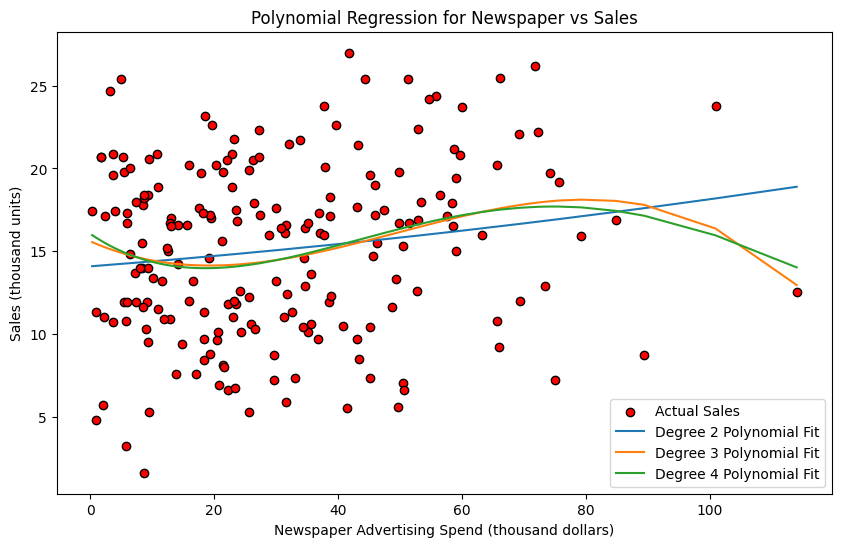

In [50]:
from sklearn.preprocessing import PolynomialFeatures

x_lab = 'Newspaper'
X = df[[x_lab]]
y = df['Sales']

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', edgecolor='black', label='Actual Sales')

# Sort the data for smoother curve plotting
X_sorted = np.sort(X, axis=0)

for degree in range(2, 5):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict and calculate metrics
    y_pred = model.predict(X_poly)
    r_squared = r2_score(y, y_pred)
    rss = np.sum((y - y_pred)**2)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"Polynomial Regression (Degree {degree}) for TV vs Sales:")
    print(f"  R-squared (R^2): {r_squared:.4f}")
    print(f"  Residual Sum of Squares (RSS): {rss:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 30)

    # Predict for plotting the curve
    X_sorted_poly = poly_features.transform(X_sorted)
    y_sorted_pred = model.predict(X_sorted_poly)
    plt.plot(X_sorted, y_sorted_pred, label=f'Degree {degree} Polynomial Fit')

plt.xlabel(f'{x_lab} Advertising Spend (thousand dollars)')
plt.ylabel('Sales (thousand units)')
plt.title(f'Polynomial Regression for {x_lab} vs Sales')
plt.legend()
plt.show()